In [1]:
import numpy as np 
from scipy import misc    
import imageio # for loading image
import matplotlib.pyplot as plt

In [2]:
path ="faces/"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
fn = path + prefix + str(1).zfill(2) + '.' + "sleepy" + surfix
im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))
# collect all data
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

/tmp/ipykernel_1584049/4291633668.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)
/tmp/ipykernel_1584049/4291633668.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X[:, cnt] = imageio.imread(fn).reshape(D)


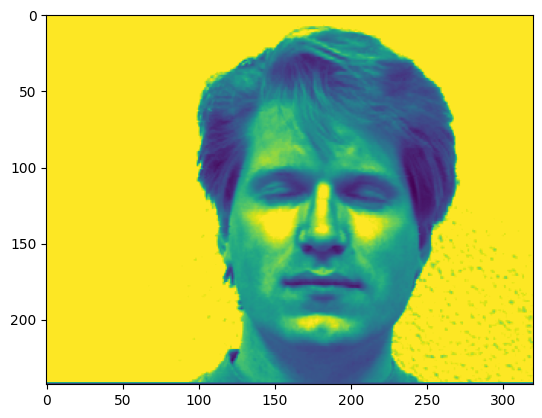

In [11]:
plt.imshow(im)

In [4]:
import numpy as np

class MyPCA:

    def __init__(self, n_components, max_iter=100, tol=1e-6):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.eig_vals = []

    @staticmethod
    def power_iteration(X, max_iter=100, tol=1e-6):
        v = np.random.rand(X.shape[1])
        v = v / np.linalg.norm(v)

        for _ in range(max_iter):
            u = X @ v
            u = u / np.linalg.norm(u)
            v_new = X.T @ u
            v_new = v_new / np.linalg.norm(v_new)

            if np.linalg.norm(v_new - v) < tol:
                break

            v = v_new
#         if v[0] < 0:
#             v = -v
        eig_val = u.T @ (X @ v)

        # Adjust the sign of the eigenvector if the first element is negative


        return eig_val, v

    def fit(self, X):
        # Standardize data
        X = X.copy()
        self.mean = np.mean(X, axis=0)
        X_std = X - self.mean

        eig_vals = []
        eig_vecs = []

        for _ in range(self.n_components):
            eig_val, eig_vec = self.power_iteration(X_std, self.max_iter, self.tol)
            eig_vals.append(eig_val)
            eig_vecs.append(eig_vec)

            X_std = X_std - (X_std @ eig_vec)[:, np.newaxis] * eig_vec[np.newaxis, :]

        eig_vecs = np.array(eig_vecs)

        self.components = eig_vecs

        # Explained variance ratio
        eig_vals_sum = np.sum(eig_vals)
        self.explained_variance_ratio = [i / eig_vals_sum for i in eig_vals]
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)
        self.eig_vals = eig_vals
        self.eig_vecs = eig_vecs
        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean)
        X_proj = X_std.dot(self.components.T)

        return X_proj

# Example usage
my_pca = MyPCA(n_components=100).fit(X.T)

print('Components:\n', my_pca.components)


Components:
 [[ 3.64754095e-04  5.91616818e-04  6.96819713e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.07381231e-03  1.24774534e-03  1.28800193e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.09857332e-04  1.08118921e-04  1.18442329e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.52559845e-03  1.01786955e-03  6.73201521e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.11664967e-04  3.71155076e-04  7.40310349e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.29230862e-05  2.47771644e-04 -2.92649348e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [ ]:
U = my_pca.components.T

/tmp/ipykernel_1584049/2738135941.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)  #X


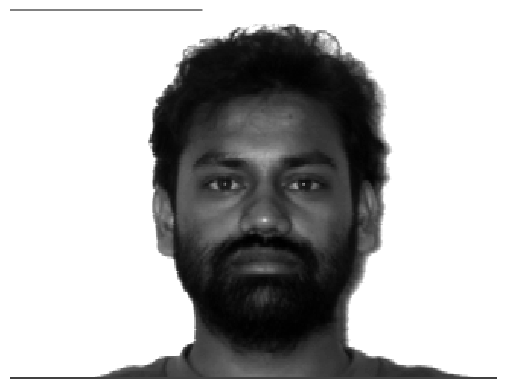

(100, 1)


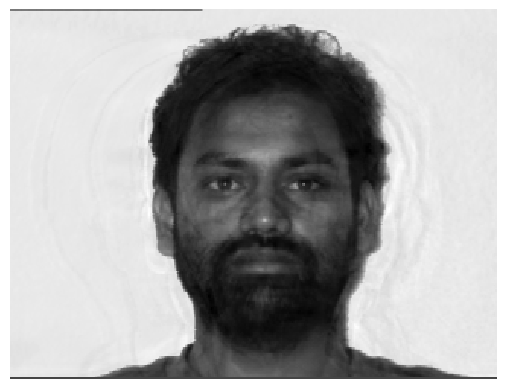

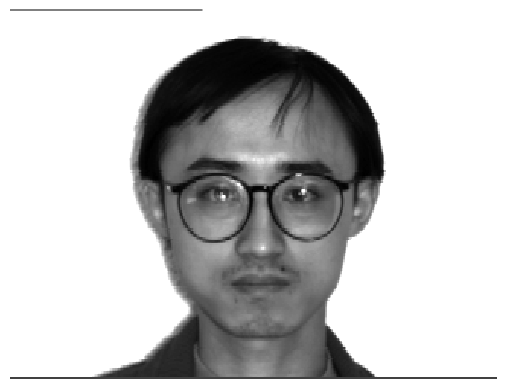

(100, 1)


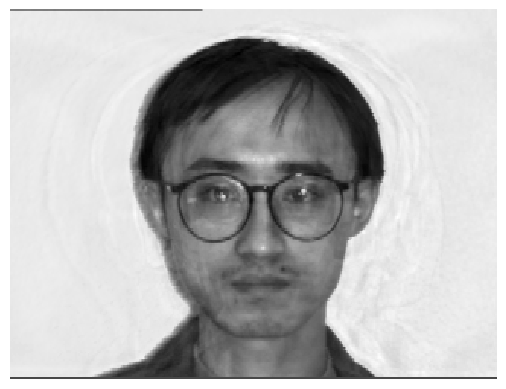

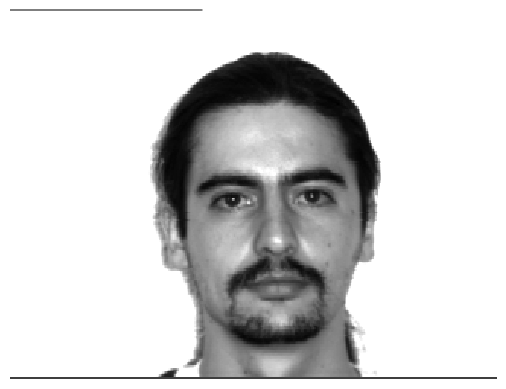

(100, 1)


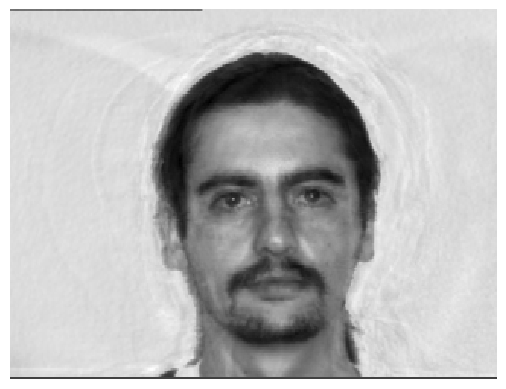

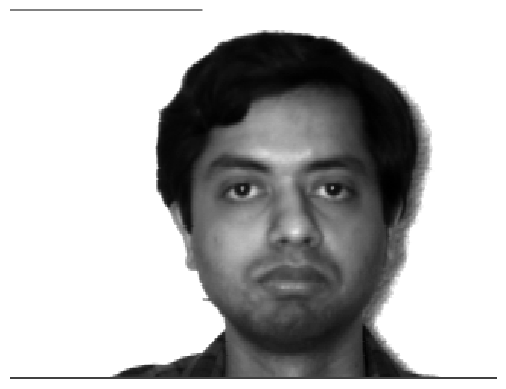

(100, 1)


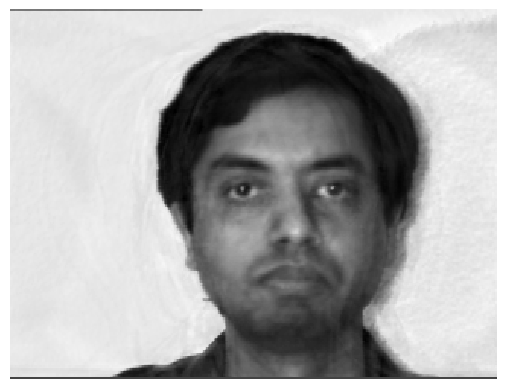

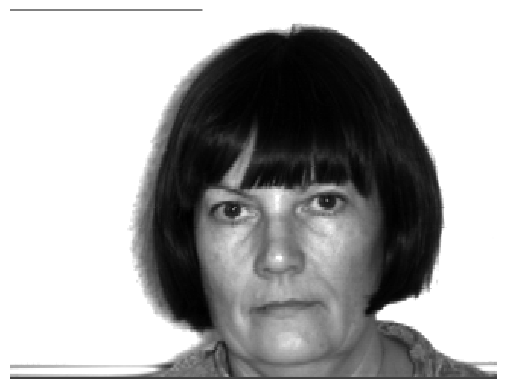

(100, 1)


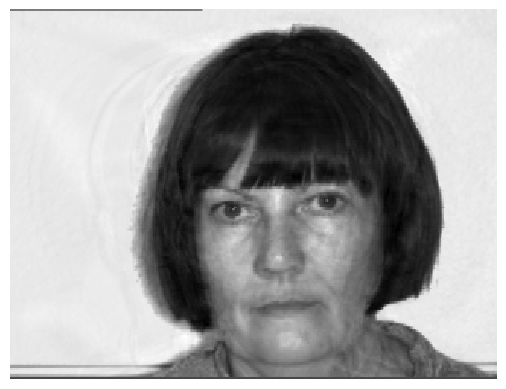

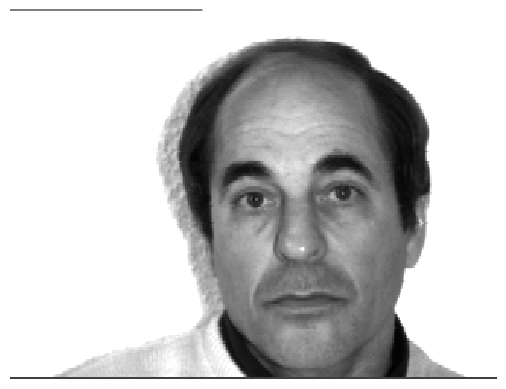

(100, 1)


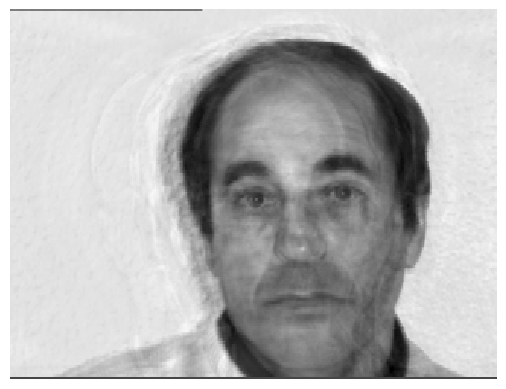

In [17]:
for person_id in range(7, 13):
    for state in ['centerlight']:
        fn = path+ "/"+ prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)  #X
        plt.axis('off')
    #         plt.imshow(im, interpolation='nearest' )
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
    #         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - my_pca.mean_.reshape(D, 1)   # X -X_mean
        # encode
        z = U.T.dot(x) #
        print(z.shape)
        #decode
        x_tilde = U.dot(z) + my_pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(243, 320)
        plt.axis('off')
    #         plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
    #         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()